In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
path = r'D:\2024.2\HCC\Classification_HCC\Code_HCC\Final_dataset\Merged_HCC (Train_Test) (version 1).xlsx'
df = pd.read_excel(path, sheet_name = 'Train_mean')


In [8]:
data = df.copy()

In [9]:
data.columns

Index(['Age', 'Gender', 'Leucocytes', 'Platelets', 'INR', 'AST', 'ALT',
       'Total_Bil', 'Dir_Bil', 'Albumin', 'Creatinine', 'HBsAg', 'HCVAb',
       'AFP', 'AST_ALT_ratio', 'Obesity', 'Label_HCC'],
      dtype='object')

In [10]:
selected_columns = ['Age', 'Gender', 'Leucocytes', 'Platelets', 'INR', 'AST', 'ALT',
       'Total_Bil', 'Dir_Bil', 'Albumin', 'Creatinine', 'HBsAg', 'HCVAb', 'AFP',
       'AST_ALT_ratio', 'Obesity']

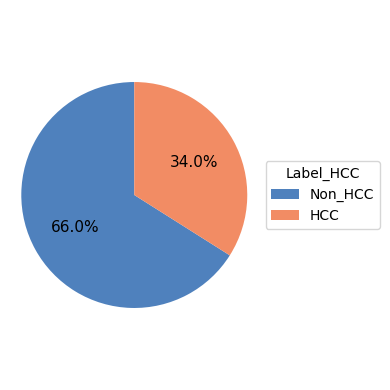

In [14]:
label_counts = df['Label_HCC'].value_counts()

labels = ['Non_HCC', 'HCC']
colors = ['#4F81BD', '#F28C64']  

plt.figure(figsize=(4,4))
plt.pie(
    label_counts,
    labels=None,  
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    textprops={'fontsize': 11, 'color': 'black'}
)

plt.legend(
    labels,
    title="Label_HCC",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1),
    fontsize=10,
    title_fontsize=10
)

plt.axis('equal')  
plt.tight_layout()

plt.show()


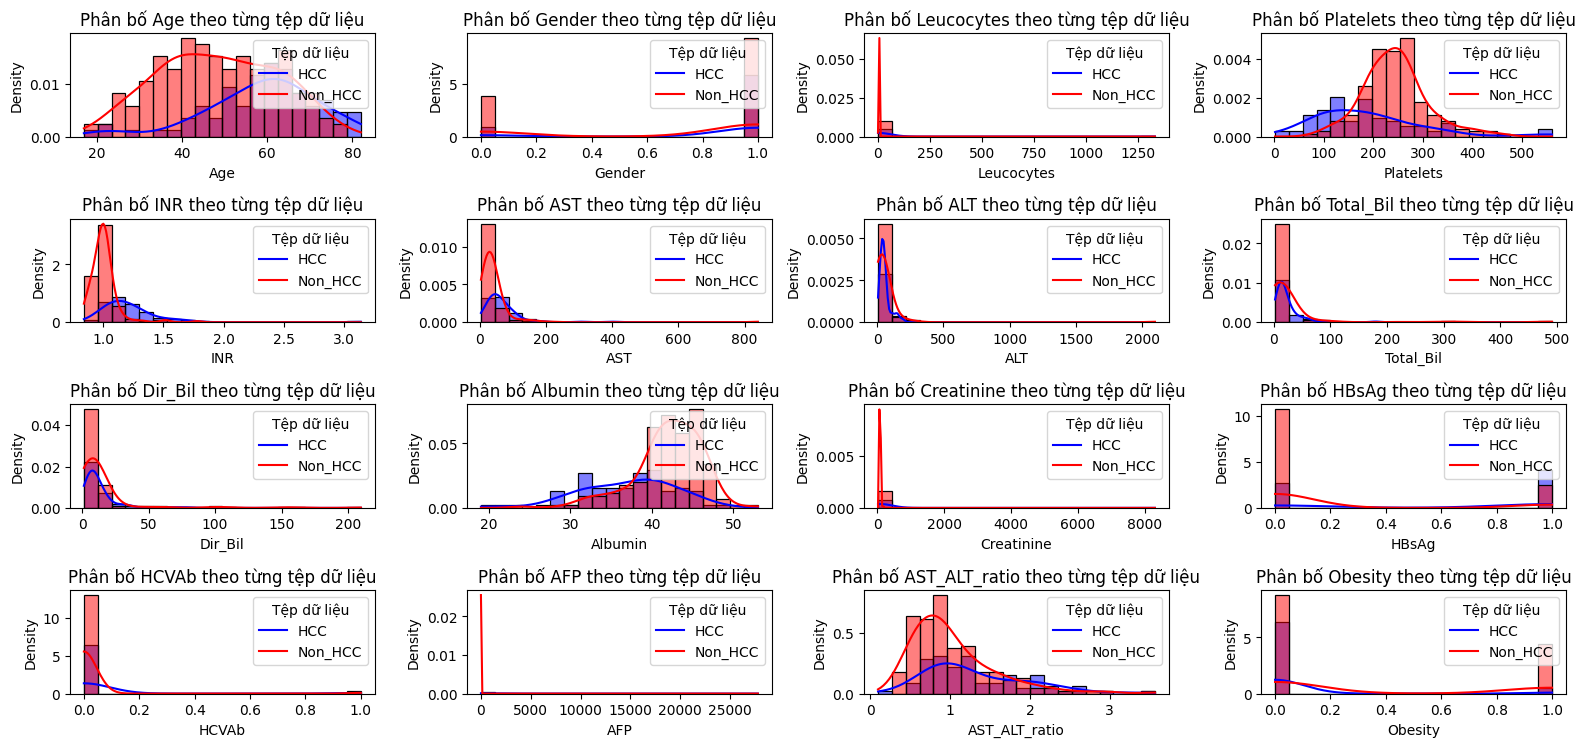

In [15]:
plt.figure(figsize = (16,9))
for i, col in enumerate(selected_columns, 1):
    plt.subplot(5,4,i)
    sns.histplot(data = data, x = col, hue = "Label_HCC", stat = 'density', kde = True, bins = 20, palette = {0: 'red', 1: 'blue'})
    plt.title(f'Phân bố {col} theo từng tệp dữ liệu')
    plt.legend(title="Tệp dữ liệu", labels=["HCC", "Non_HCC"], loc='upper right', fontsize='medium')
plt.tight_layout()
plt.show()

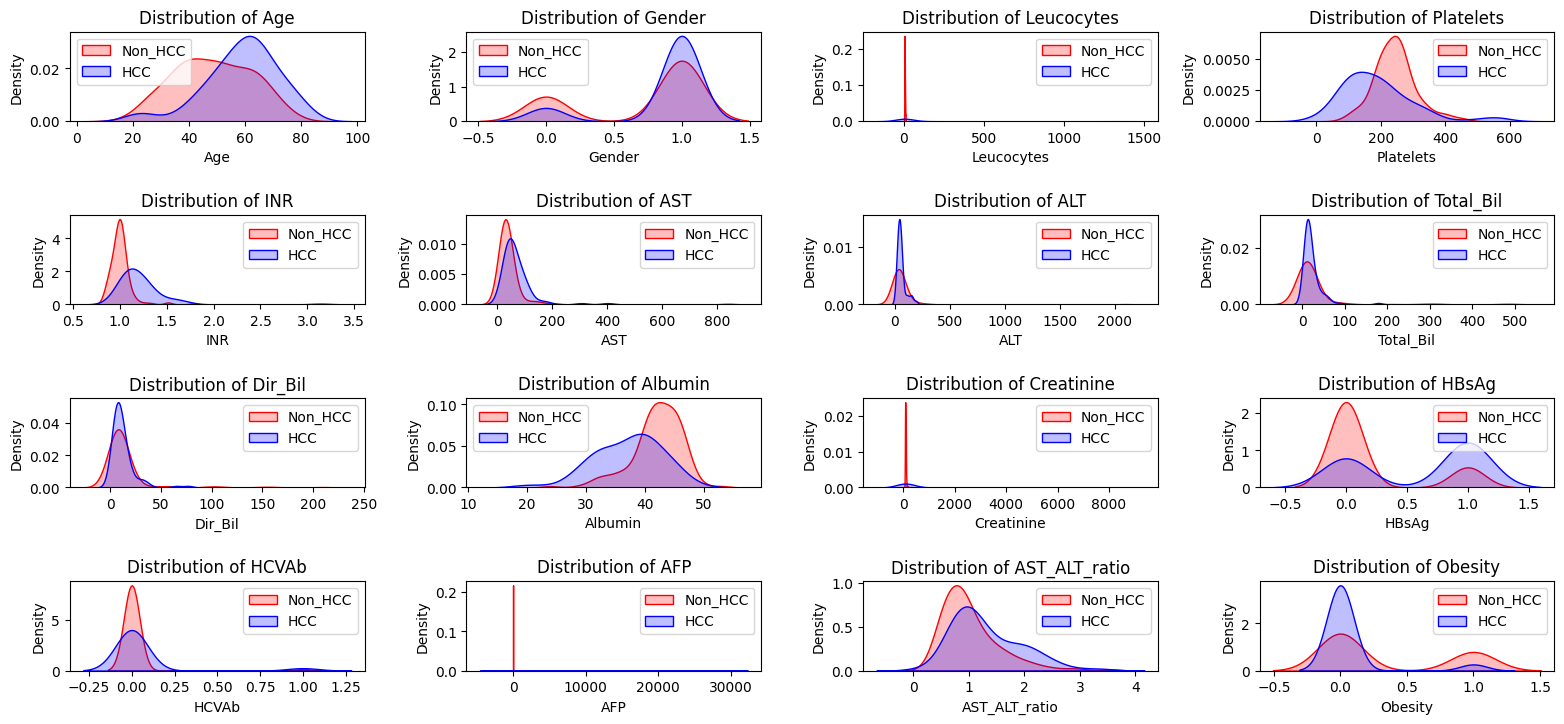

In [16]:
plt.figure(figsize=(16, 9))
for i, metric in enumerate(selected_columns,1):
    plt.subplot(5,4,i)
    sns.kdeplot(data[data['Label_HCC'] == 0][metric], fill = True, color = 'red', label = 'Non_HCC', warn_singular=False)
    sns.kdeplot(data[data['Label_HCC'] == 1][metric], fill = True, color = 'blue', label = 'HCC')
    plt.title(f'Distribution of {metric}')
    plt.legend(loc = 'best')
plt.tight_layout(pad=2.0)
plt.show()